In [87]:
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [88]:
#since seaborn has inbuilt datasets, and titanic is one of them we will use it from here
data_sets=sns.get_dataset_names()
# for d in data_sets:
#     if d.startswith('t'):
#         print(d)
#     else:
#         None
        
df = sns.load_dataset('titanic')
df=df.rename(columns={'sex':'gender'})

data = df[['pclass','gender','age','sibsp','parch','fare','embark_town','alive']]
display(data.head())

#Now that we loaded the required data, we will clean the data
empty = data.isnull().sum()
print(empty)
print('total data')
print(len(data))
# we have 177 missing ages from total 891 so we are simply droping them

data = data.dropna()
print('After droping empty values rows')
print(data.isnull().sum())

# now we will go on to the next step

,pclass,gender,age,sibsp,parch,fare,embark_town,alive
0,3,male,22.0,1,0,7.2500,Southampton,no
1,1,female,38.0,1,0,71.2833,Cherbourg,yes
2,3,female,26.0,0,0,7.9250,Southampton,yes
3,1,female,35.0,1,0,53.1000,Southampton,yes
4,3,male,35.0,0,0,8.0500,Southampton,no


pclass           0
gender           0
age            177
sibsp            0
parch            0
fare             0
embark_town      2
alive            0
dtype: int64
total data
891
After droping empty values rows
pclass         0
gender         0
age            0
sibsp          0
parch          0
fare           0
embark_town    0
alive          0
dtype: int64


## Question 1


In [89]:
"""
-> First we will load the library labelencoder to turn string values to numerics for example if we take gender column, its either
    male or female so the encoder will convert it into 0 and 1 for male and female
"""
from sklearn.preprocessing import LabelEncoder

## Question 2


In [90]:

#loading the features 
X=data[['pclass','gender','age','sibsp','parch','fare','embark_town']].copy()
#loading target
y=data['alive']

#changing the string values into numerics
gender_encoder = LabelEncoder()
embark_encoder = LabelEncoder()
X['gender'] = gender_encoder.fit_transform(X['gender'])
X['embark_town'] = embark_encoder.fit_transform(X['embark_town'])

y = LabelEncoder().fit_transform(y)

# now we will train the data through knn since we already have split the data
knn = KNeighborsClassifier()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

knn.fit(X_train,y_train)

y_predict = knn.predict(X_test)

acc_score = accuracy_score(y_test,y_predict)
print(f"Accuracy Score : {acc_score:.4f}")

Accuracy Score : 0.6853


In [91]:
random_states = [1,10,42,10,20,12,15,25,50,75,100] 
accuracy_scores = [] #a list to store random states accuracy

for state in random_states:
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=state)
    
    knn.fit(X_train,y_train)
    y_predict = knn.predict(X_test)
    acc = accuracy_score(y_test,y_predict)
    accuracy_scores.append(acc)
    
    print(f"Random state {state}: Accuracy = {acc:.4f}")
    

Random state 1: Accuracy = 0.6573
Random state 10: Accuracy = 0.7063
Random state 42: Accuracy = 0.6853
Random state 10: Accuracy = 0.7063
Random state 20: Accuracy = 0.7063
Random state 12: Accuracy = 0.7203
Random state 15: Accuracy = 0.6853
Random state 25: Accuracy = 0.6643
Random state 50: Accuracy = 0.7203
Random state 75: Accuracy = 0.7063
Random state 100: Accuracy = 0.6643


## Question 3


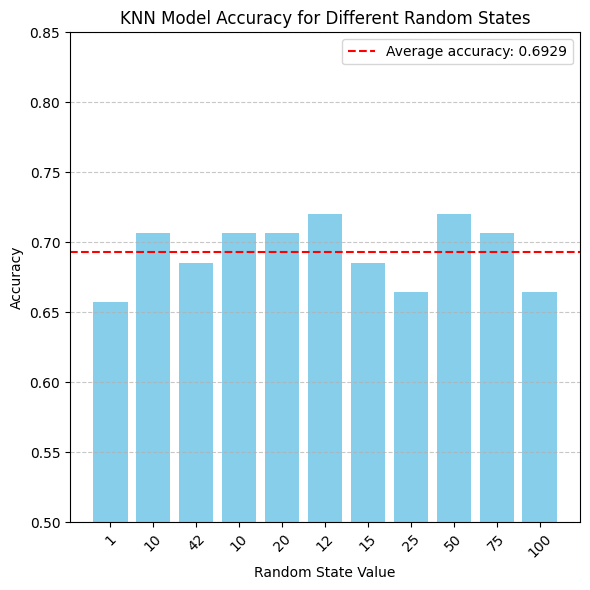

In [92]:
plt.figure(figsize=(6,6))
plt.bar(range(len(random_states)),accuracy_scores,color='skyblue')

avg_acc = np.mean(accuracy_scores)
plt.axhline(y=avg_acc, color='red',linestyle='--',label=f'Average accuracy: {avg_acc:.4f}')

plt.xticks(range(len(random_states)), random_states, rotation=45)
plt.xlabel('Random State Value')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy for Different Random States')
plt.ylim(0.5, 0.85)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()